In [1]:
from itertools import permutations
from pathlib import Path

import crowsetta
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import pyprojroot
from scipy import stats
from scipy.spatial import distance
import toml
from tqdm import tqdm
import vak

import article

#### inspection
To test whether the predictions of `TweetyNet` models recovered key behavioral findings, we studied branch points in Bengalese finch song, where a syllable (e.g. 'b') can be followed by more than one type (e.g. 'b-b' and 'b-c' are two transitions that might occur).    
It has been previously reported that the transition probabilities at these branch points are stable over days, but can be flexibly modified depending on behavioral context.  
So that we could determine whether `TweetyNet` predictions would allow us to reproduce this finding, 
we first visually inspected plots of transition matrices to look for branch points.
Then, for each of the four birds in the Bengalese Finch song repository, we identified a branch point that 
we could verify reproduced the previously reported finding of remaining stable across days, 
as shown with permutation tests.
Plots of the transition matrices and tests of the stability of the branch point probabilities that we identified are shown below.

1. Load annotations from dataset .csv files generated by running `vak prep`

In [2]:
behav_configs_root = pyprojroot.here() / 'data/configs/Bengalese_Finches/behavior'

In [3]:
animal_ID_roots = sorted(
    [subdir
     for subdir in behav_configs_root.iterdir()
     if subdir.is_dir()]
)
animal_day_config_map = {}
for animal_ID_root in animal_ID_roots:
    animal_day_config_map[animal_ID_root.name] = sorted([subdir
                                                         for subdir in animal_ID_root.iterdir()
                                                         if subdir.is_dir()])

In [4]:
animal_day_config_map = {
    animal_ID: {
        day_dir.name: sorted(day_dir.glob('*.toml'))[0] for day_dir in day_dirs
    }
    for animal_ID, day_dirs in animal_day_config_map.items()
    
}

In [5]:
animal_day_transmats = {}
for animal_id, day_config_map in animal_day_config_map.items():
    day_transmats = {}
    for day, config_path in day_config_map.items():
        with config_path.open('r') as fp:
            config = toml.load(fp)
        prep_csv_path = pyprojroot.here() / config['EVAL']['csv_path']
        df = pd.read_csv(prep_csv_path)
        annots = vak.annotation.from_df(df)
        day_transmats[day] = article.bfbehav.sequence.transmat_from_annots(annots, thresh=0.002)
    animal_day_transmats[animal_id] = day_transmats

#### plot transition matrices for each day, find a branch point whose probability remains constant

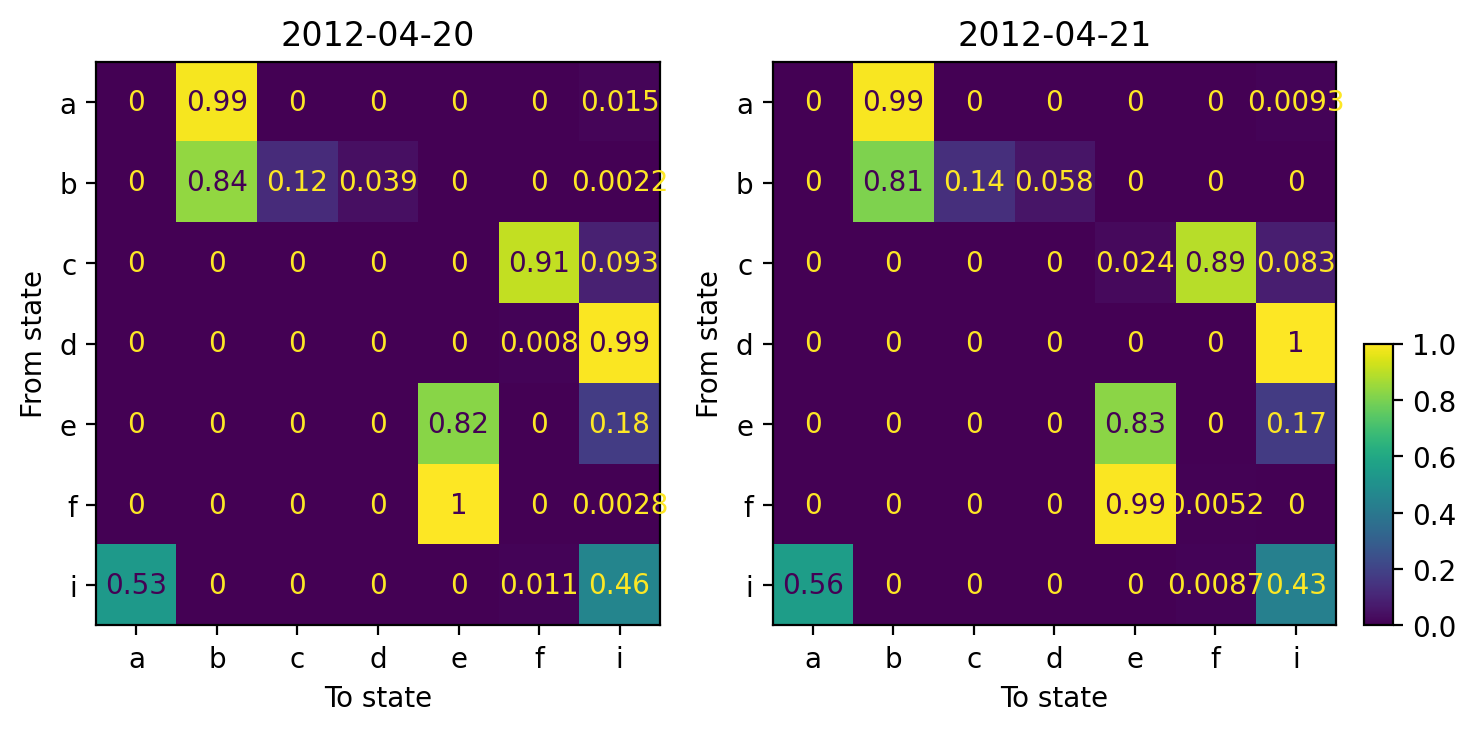

In [6]:
article.plot.trans_mat.trans_mat_all_days(animal_day_transmats, animal_id='bl26lb16')

In [7]:
p_vals, alpha = article.bfbehav.stats.perm_test_across_days(animal_day_transmats,
                                                            animal_id='bl26lb16',
                                                            from_state='b',
                                                            transition=('b', 'c'),
                                                            n_perm=1000,)

performing permutation test for: 2012-04-20, 2012-04-21
p-value was 0.207
performing permutation test for: 2012-04-21, 2012-04-20
p-value was 0.199
none of the p-values were less than corrected alpha 0.025.
Fail to reject the null hypothesis. p-values: [0.207, 0.199]


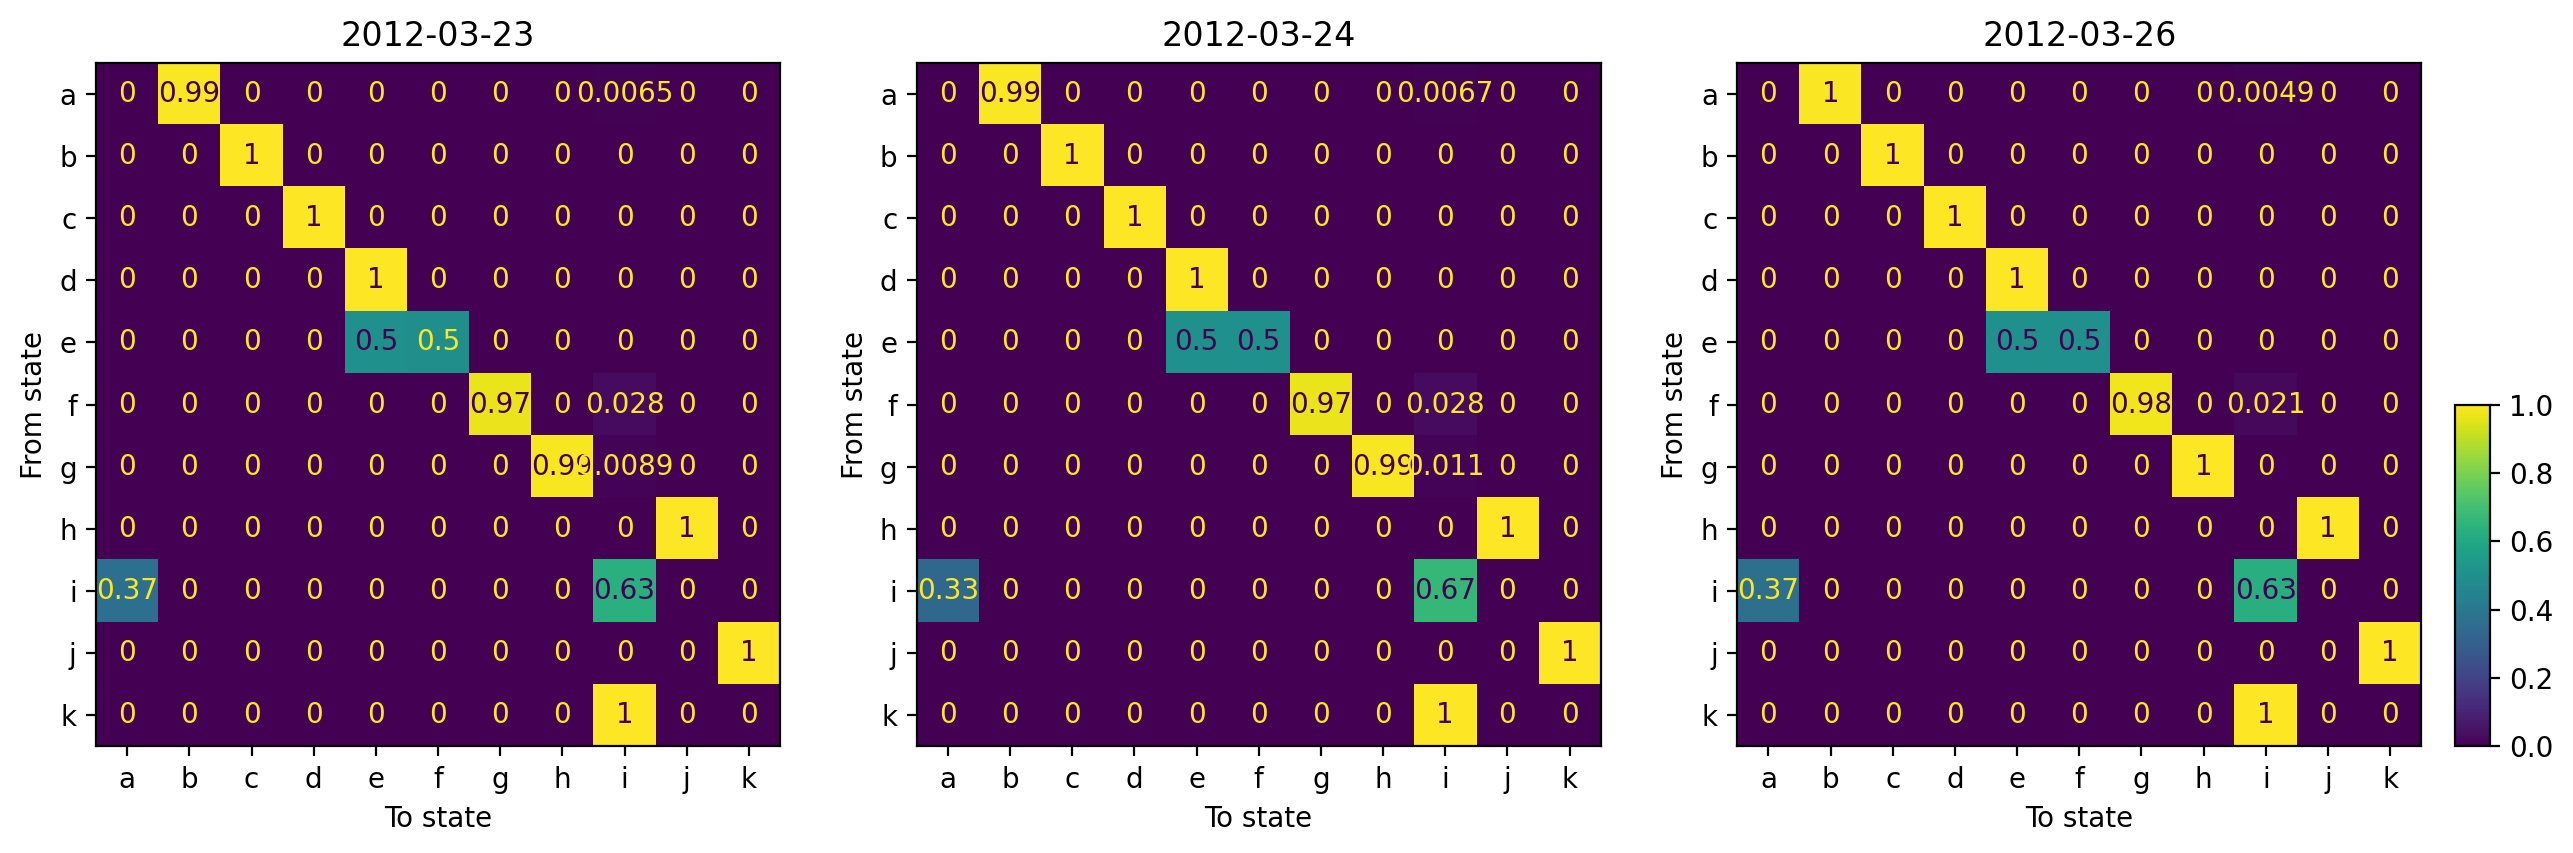

In [9]:
article.plot.trans_mat.trans_mat_all_days(animal_day_transmats, animal_id='gy6or6', figsize=(15, 5))

In [10]:
p_vals, alpha = article.bfbehav.stats.perm_test_across_days(animal_day_transmats,
                                                            animal_id='gy6or6',
                                                            from_state='e',
                                                            transition=('e', 'f'),
                                                            n_perm=1000,)

performing permutation test for: 2012-03-23, 2012-03-24
p-value was 1.0
performing permutation test for: 2012-03-23, 2012-03-26
p-value was 1.0
performing permutation test for: 2012-03-24, 2012-03-23
p-value was 1.0
performing permutation test for: 2012-03-24, 2012-03-26
p-value was 1.0
performing permutation test for: 2012-03-26, 2012-03-23
p-value was 1.0
performing permutation test for: 2012-03-26, 2012-03-24
p-value was 1.0
none of the p-values were less than corrected alpha 0.008333333333333333.
Fail to reject the null hypothesis. p-values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


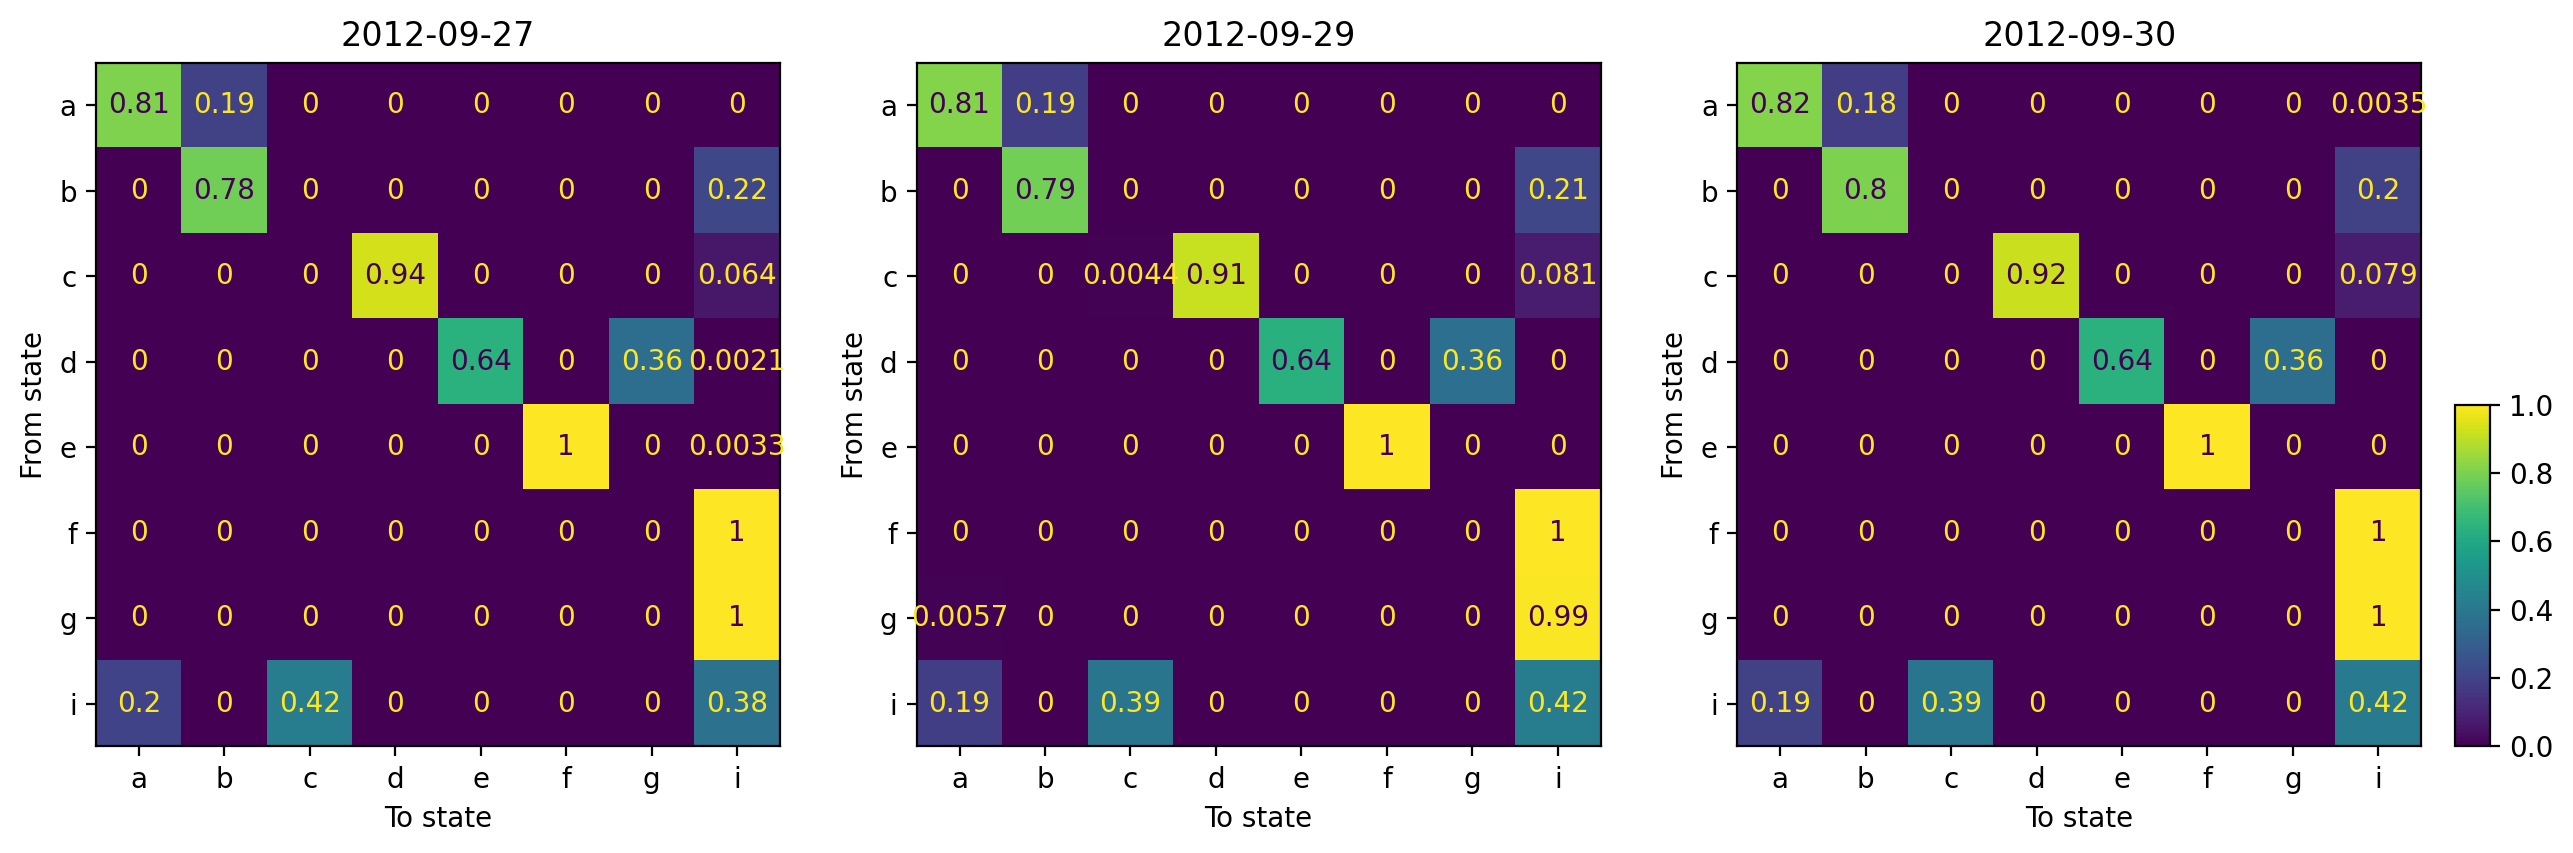

In [11]:
article.plot.trans_mat.trans_mat_all_days(animal_day_transmats, animal_id='or60yw70', figsize=(15, 5))

In [12]:
p_vals, alpha = article.bfbehav.stats.perm_test_across_days(animal_day_transmats,
                                                            animal_id='or60yw70',
                                                            from_state='d',
                                                            transition=('d', 'e'),
                                                            n_perm=1000,)

performing permutation test for: 2012-09-27, 2012-09-29
p-value was 0.944
performing permutation test for: 2012-09-27, 2012-09-30
p-value was 1.0
performing permutation test for: 2012-09-29, 2012-09-27
p-value was 0.947
performing permutation test for: 2012-09-29, 2012-09-30
p-value was 0.903
performing permutation test for: 2012-09-30, 2012-09-27
p-value was 1.0
performing permutation test for: 2012-09-30, 2012-09-29
p-value was 0.918
none of the p-values were less than corrected alpha 0.008333333333333333.
Fail to reject the null hypothesis. p-values: [0.944, 1.0, 0.947, 0.903, 1.0, 0.918]


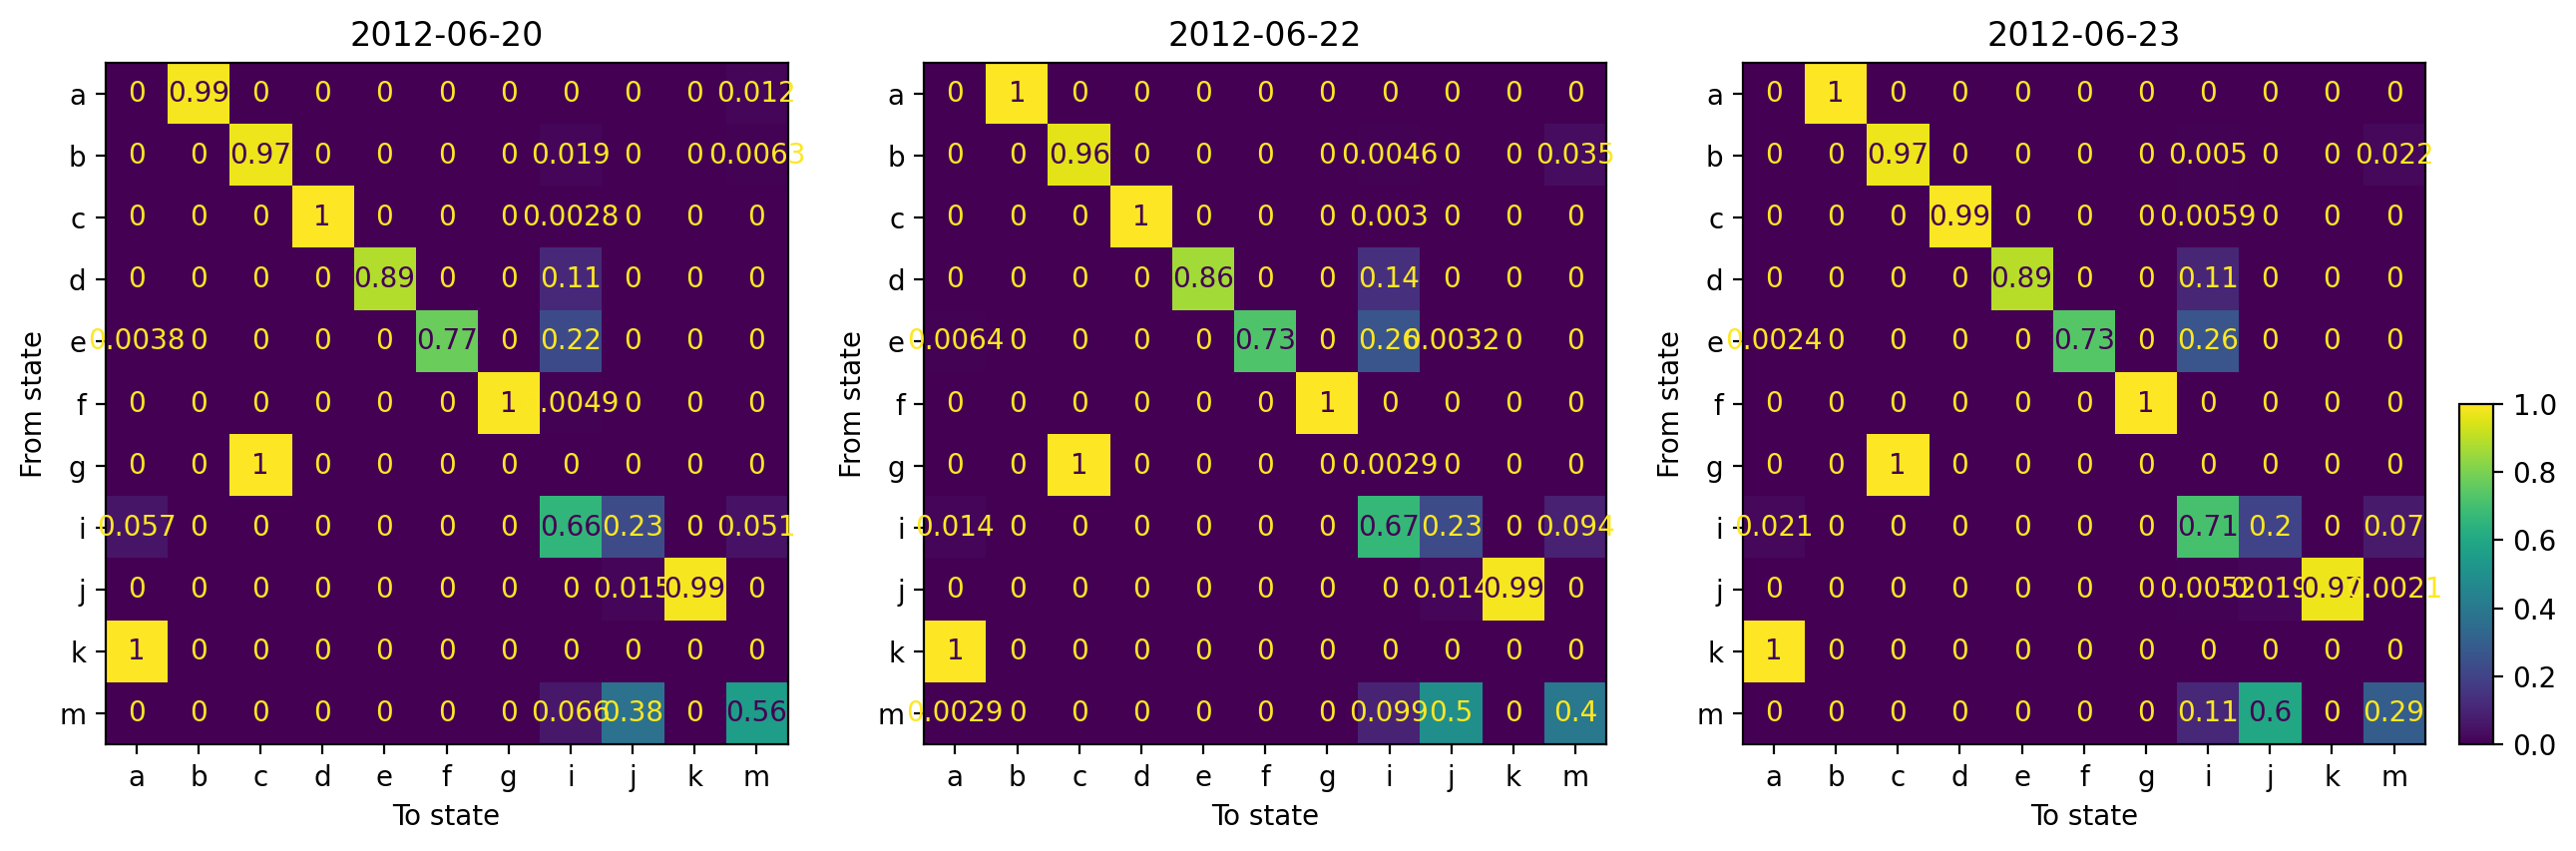

In [13]:
article.plot.trans_mat.trans_mat_all_days(animal_day_transmats, animal_id='gr41rd51', figsize=(15, 5))

In [14]:
p_vals, alpha = article.bfbehav.stats.perm_test_across_days(animal_day_transmats,
                                                            animal_id='gr41rd51',
                                                            from_state='e',
                                                            transition=('e', 'f'),
                                                            n_perm=1000,)

performing permutation test for: 2012-06-20, 2012-06-22
p-value was 0.183
performing permutation test for: 2012-06-20, 2012-06-23
p-value was 0.196
performing permutation test for: 2012-06-22, 2012-06-20
p-value was 0.167
performing permutation test for: 2012-06-22, 2012-06-23
p-value was 0.886
performing permutation test for: 2012-06-23, 2012-06-20
p-value was 0.208
performing permutation test for: 2012-06-23, 2012-06-22
p-value was 0.905
none of the p-values were less than corrected alpha 0.008333333333333333.
Fail to reject the null hypothesis. p-values: [0.183, 0.196, 0.167, 0.886, 0.208, 0.905]
